In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')
# 合并方便后面的操作
df = pd.concat([train_data, test_data], ignore_index=True)
# print(df.info())

### 'price'为长尾分布，需要做数据转换

D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

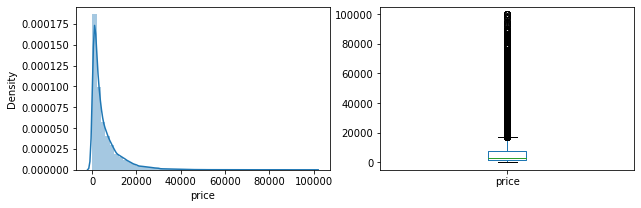

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
plt.figure(figsize=(10, 3))
plt.subplot(1, 2,1)
sns.distplot(train_data['price'])
plt.subplot(1,2,2)
train_data['price'].plot.box()

D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


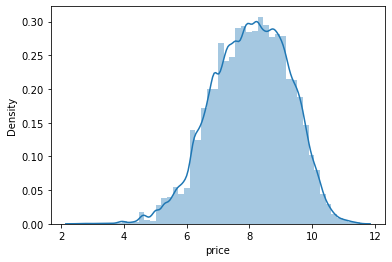

In [5]:
plt.figure()
# log1p = log（x+1）
sns.distplot(np.log1p(train_data['price']))
# 'price'转化
df['price'] = np.log1p(df['price'])

In [894]:
# df['price']

### 处理缺失值

In [895]:
# # print(test_data)# 共50000
# print(test_data.isnull().sum())
# print('bodyType的缺失比例：',1504/50000)
# print('fuelType的缺失比例：',2924/50000)
# print('gearbox的缺失比例：',1968/50000)

In [896]:
# # print(train_data)# 共150000 
# print(train_data.isnull().sum())
# print('bodyType的缺失比例：',4506/50000)
# print('fuelType的缺失比例：',8680/50000)
# print('gearbox的缺失比例：', 5981/50000)

In [897]:
# '''有缺失的字段，缺失的比例
# model  车型编码          1  
# bodyType 车身类型 分类 3%    4506   
# fuelType 燃油类型 分类5.8%   8680
# gearbox  变速箱   分类3.9%     5981
# 根据比例来看都可以填充，
# '''

In [898]:
# 众数填充model
df.model.fillna(df.model.mode()[0],inplace=True)

# 其余缺失字段都是分类型，使用-1填充
for col in df.columns:
    if col != "price":
        df[col].fillna(-1,inplace=True) 

# 查看是否都填充完了
df.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox                  0
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [899]:
# 先将此特征的缺失值用-1填充，以后对比删除此特征
print(df['notRepairedDamage'].value_counts())
'''
汽车有尚未修复的损坏：是：0，否：1
0.0    148585
-       32393
1.0     19022
'''

print(24324/150000)# 16%

# 此处改进点：随机打乱，再填充
df['notRepairedDamage'].replace('-','-1',inplace=True)

print(df['notRepairedDamage'].value_counts())

0.0    148585
-       32393
1.0     19022
Name: notRepairedDamage, dtype: int64
0.16216
0.0    148585
-1      32393
1.0     19022
Name: notRepairedDamage, dtype: int64


In [900]:
df['notRepairedDamage'] = df['notRepairedDamage'].astype('float64')
df['notRepairedDamage']

0         0.0
1        -1.0
2         0.0
3         0.0
4         0.0
         ... 
199995   -1.0
199996    0.0
199997    0.0
199998    0.0
199999    0.0
Name: notRepairedDamage, Length: 200000, dtype: float64

In [901]:
df['price']

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
199995       NaN
199996       NaN
199997       NaN
199998       NaN
199999       NaN
Name: price, Length: 200000, dtype: float64

### 处理异常值

In [902]:
# print((train_data['power']>600).sum()/150000)
# print((test_data['power']>600).sum()/50000)

In [903]:
df['power'] = df['power'].map(lambda x: 600 if x>600 else x) #限定power<=600

D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

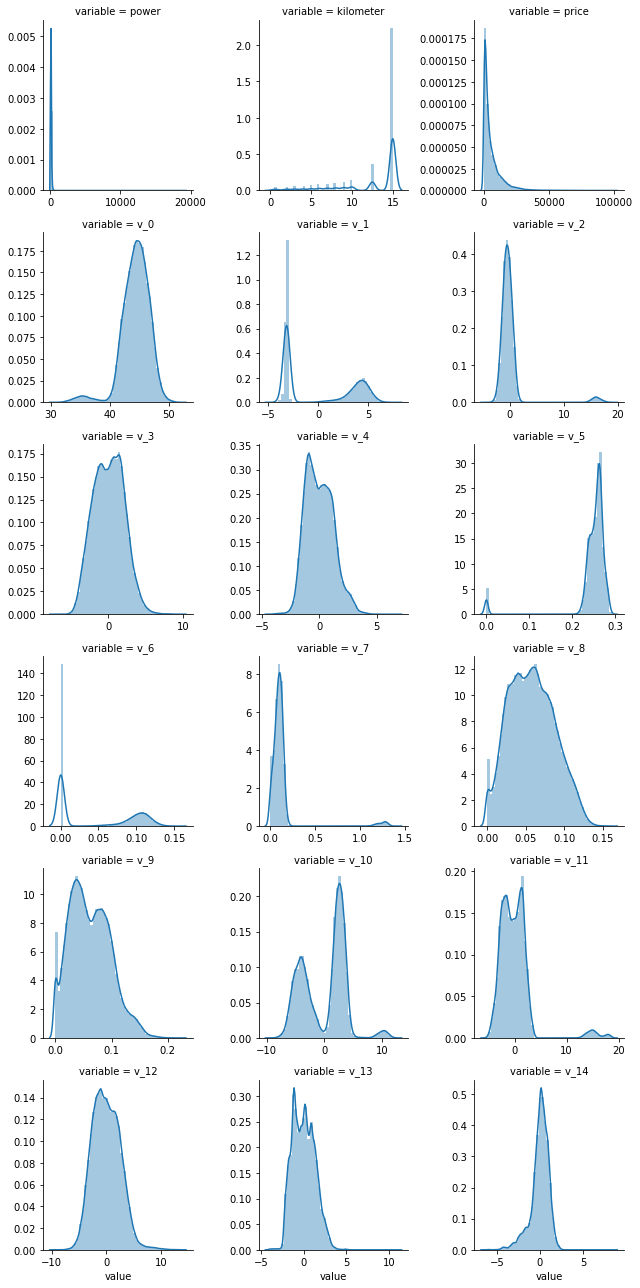

In [904]:
num_fea = ['power', 'kilometer','price','v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14']
f = pd.melt(train_data, value_vars=num_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")
plt.tight_layout()

In [905]:
# 对可分类的连续特征进行分桶，kilometer是已经分桶了
bin = [-1]+[i*10 for i in range(1,61)]
df['power_bin'] = pd.cut(df['power'], bin, labels=False)
bin = [-1]+[i*10 for i in range(1,26)]
df['model_bin'] = pd.cut(df['model'], bin, labels=False)

In [906]:
df['name_count'] = df.groupby(['name'])['SaleID'].transform('count')

In [907]:
# 删除没有用的列
del df['name']
del df['offerType']
del df['seller']

### 特征工程

In [908]:
from datetime import datetime
def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])
    if month < 1:
        month = 1
    date = datetime(year, month, day)
    return date

df['regDate'] = df['regDate'].apply(date_process)
df['creatDate'] = df['creatDate'].apply(date_process)
df['regDate_year'] = df['regDate'].dt.year
df['regDate_month'] = df['regDate'].dt.month
df['regDate_day'] = df['regDate'].dt.day
df['creatDate_year'] = df['creatDate'].dt.year
df['creatDate_month'] = df['creatDate'].dt.month
df['creatDate_day'] = df['creatDate'].dt.day
df['car_age_day'] = (df['creatDate'] - df['regDate']).dt.days#二手车使用天数
df['car_age_year'] = round(df['car_age_day'] / 365, 1)#二手车使用年数

In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             200000 non-null  int64         
 1   regDate            200000 non-null  datetime64[ns]
 2   model              200000 non-null  float64       
 3   brand              200000 non-null  int64         
 4   bodyType           200000 non-null  float64       
 5   fuelType           200000 non-null  float64       
 6   gearbox            200000 non-null  float64       
 7   power              200000 non-null  int64         
 8   kilometer          200000 non-null  float64       
 9   notRepairedDamage  200000 non-null  float64       
 10  regionCode         200000 non-null  int64         
 11  creatDate          200000 non-null  datetime64[ns]
 12  price              150000 non-null  float64       
 13  v_0                200000 non-null  float64 

In [910]:
#类别特征'model', 'brand', 'bodyType', 'fuelType','gearbox', 'kilometer', 'notRepairedDamage', 'regionCode',
# 和数值特征'power','car_age_day'的交叉统计 只保留了部分有效组合

cat_cols = ['brand','model','kilometer','fuelType','bodyType']
for col in cat_cols:
    t = df.groupby(col,as_index=False)['power'].agg(
        {col+'_count':'count',col+'_power_max':'max',col+'_power_median':'median',
         col+'_power_min':'min',col+'_power_sum':'sum',col+'_power_std':'std',col+'_power_mean':'mean'})
    df = pd.merge(df,t,on=col,how='left')
for col in cat_cols:
    t = df.groupby(col,as_index=False)['car_age_day'].agg(
        {col+'_car_age_day_max':'max',col+'_car_age_day_median':'median',
         col+'_car_age_day_min':'min',col+'_car_age_day_sum':'sum',col+'_car_age_day_std':'std',col+'_car_age_day_mean':'mean'})
    df = pd.merge(df,t,on=col,how='left')

In [911]:
# 查看增加字段后，有多少个缺失值
df[[col for col in df.columns if col != 'price']].isnull().sum().sum()

2

In [912]:
# 找到是哪些字段产生了缺失值
res = []
for col in df.columns:
    if col != 'price':
        if df[col].isnull().sum() != 0:
            res.append(col)
print(res)

['model_power_std', 'model_car_age_day_std']


In [913]:
# 将两个缺失值用众数填充
for col in df.columns:
    if col != 'price':
        df[col].fillna(df[col].mode()[0],inplace=True)

In [914]:
# 确认price字段外没有缺失值了
df[[col for col in df.columns if col != 'price']].isnull().sum().sum()

0

In [915]:
df.columns

Index(['SaleID', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage',
       ...
       'fuelType_car_age_day_min', 'fuelType_car_age_day_sum',
       'fuelType_car_age_day_std', 'fuelType_car_age_day_mean',
       'bodyType_car_age_day_max', 'bodyType_car_age_day_median',
       'bodyType_car_age_day_min', 'bodyType_car_age_day_sum',
       'bodyType_car_age_day_std', 'bodyType_car_age_day_mean'],
      dtype='object', length=104)

In [916]:
df

,SaleID,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,fuelType_car_age_day_min,fuelType_car_age_day_sum,fuelType_car_age_day_std,fuelType_car_age_day_mean,bodyType_car_age_day_max,bodyType_car_age_day_median,bodyType_car_age_day_min,bodyType_car_age_day_sum,bodyType_car_age_day_std,bodyType_car_age_day_mean
0,0,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
1,1,2003-03-01,40.0,1,2.0,0.0,0.0,0,15.0,-1.0,...,51,604221628,1974.092650,4946.756953,9222,4328.0,91,174796438,1814.733220,4347.088734
2,2,2004-04-03,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
3,3,1996-09-08,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
4,4,2012-01-03,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,2004-10-05,4.0,4,0.0,-1.0,1.0,150,15.0,-1.0,...,105,63566154,1764.129404,5477.951913,9224,4769.0,96,259915714,2024.025934,4709.897871
199996,249996,2013-04-09,65.0,1,0.0,0.0,0.0,179,4.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
199997,249997,2004-12-11,4.0,4,0.0,0.0,1.0,147,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
199998,249998,2002-07-02,40.0,1,4.0,0.0,1.0,176,15.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4463.0,98,59065373,2029.831364,4590.454107


<AxesSubplot:>

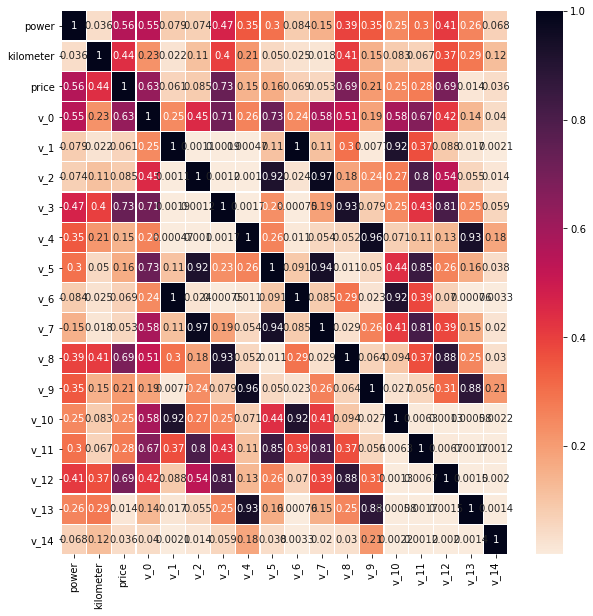

In [917]:
num_fea = ['power', 'kilometer','price','v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14']
corr1 = abs(df[df['price'].notnull()][num_fea].corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, annot=True,linewidths=0.1, cmap=sns.cm.rocket_r)
# 根据热力图num_fea中删掉这些特征: v_4 v_5 v_6 v_7 v_8 v_10 

In [918]:
del df['v_4']
del df['v_5']
del df['v_6']
del df['v_7']
del df['v_8']
del df['v_10']

In [919]:
df.columns

Index(['SaleID', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage',
       ...
       'fuelType_car_age_day_min', 'fuelType_car_age_day_sum',
       'fuelType_car_age_day_std', 'fuelType_car_age_day_mean',
       'bodyType_car_age_day_max', 'bodyType_car_age_day_median',
       'bodyType_car_age_day_min', 'bodyType_car_age_day_sum',
       'bodyType_car_age_day_std', 'bodyType_car_age_day_mean'],
      dtype='object', length=104)

In [920]:
# X_data['notRepairedDamage'] object->float64.否则xgb训练报错
df['notRepairedDamage'] = df['notRepairedDamage'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 104 entries, SaleID to bodyType_car_age_day_mean
dtypes: datetime64[ns](2), float64(52), int64(50)
memory usage: 160.2 MB


In [921]:
df.to_csv('xgb_df.csv')

In [2]:
import pandas as pd
df = pd.read_csv('xgb_df.csv',index_col=0)
df

,SaleID,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,fuelType_car_age_day_min,fuelType_car_age_day_sum,fuelType_car_age_day_std,fuelType_car_age_day_mean,bodyType_car_age_day_max,bodyType_car_age_day_median,bodyType_car_age_day_min,bodyType_car_age_day_sum,bodyType_car_age_day_std,bodyType_car_age_day_mean
0,0,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
1,1,2003-03-01,40.0,1,2.0,0.0,0.0,0,15.0,-1.0,...,51,604221628,1974.092650,4946.756953,9222,4328.0,91,174796438,1814.733220,4347.088734
2,2,2004-04-03,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
3,3,1996-09-08,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
4,4,2012-01-03,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,51,604221628,1974.092650,4946.756953,9223,5042.0,94,225536688,1923.642524,4775.082317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,249995,2004-10-05,4.0,4,0.0,-1.0,1.0,150,15.0,-1.0,...,105,63566154,1764.129404,5477.951913,9224,4769.0,96,259915714,2024.025934,4709.897871
199996,249996,2013-04-09,65.0,1,0.0,0.0,0.0,179,4.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
199997,249997,2004-12-11,4.0,4,0.0,0.0,1.0,147,12.5,0.0,...,51,604221628,1974.092650,4946.756953,9224,4769.0,96,259915714,2024.025934,4709.897871
199998,249998,2002-07-02,40.0,1,4.0,0.0,1.0,176,15.0,0.0,...,51,604221628,1974.092650,4946.756953,9224,4463.0,98,59065373,2029.831364,4590.454107


In [3]:
print("df information:")
df.info()
df1 = df.copy()
test = df1[df1['price'].isnull()]
X_train = df1[df1['price'].notnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)
Y_train = df1[df1['price'].notnull()]['price']
X_test = df1[df1['price'].isnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)
print("test information:")
test.info()
print("X_train information:")
X_train.info()

df information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 104 entries, SaleID to bodyType_car_age_day_mean
dtypes: float64(52), int64(50), object(2)
memory usage: 160.2+ MB
test information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 150000 to 199999
Columns: 104 entries, SaleID to bodyType_car_age_day_mean
dtypes: float64(52), int64(50), object(2)
memory usage: 40.1+ MB
X_train information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 99 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   model                         150000 non-null  float64
 1   brand                         150000 non-null  int64  
 2   bodyType                      150000 non-null  float64
 3   fuelType                      150000 non-null  float64
 4   gearbox                       150000 non-null  float64
 5   po

In [4]:
from sklearn.model_selection import train_test_split
# 数据集切分
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [5]:
import xgboost as xgb
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor()#n_estimator=150, learning_rate = 0.1,gamma=0,max_depth=7
    model.fit(x_train, y_train)
    return model

import lightgbm as lgb
def build_model_lgb(x_train,y_train):
    model = lgb.LGBMRegressor(n_estimator=150,num_leaves=127,learning_rate = 0.1)
    model.fit(x_train, y_train)
    return model

In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# XGBoost训练 625
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val, val_xgb)
print('XGBoost Validation MAE:', MAE_xgb)


XGBoost Validation MAE: 643.0177072174708


In [7]:
# LightGBM训练  584
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val, val_lgb)
print('LightGBM Validation MAE:', MAE_lgb)


LightGBM Validation MAE: 590.1136720499042


In [13]:
result_xgb = model_xgb.predict(X_test)
sub = pd.DataFrame(df1[df1['price'].isnull()]['SaleID'])
sub['price']=result_xgb
sub.to_csv('submission_xgb.csv',index=False)

result_lgb = model_lgb.predict(X_test)
sub = pd.DataFrame(df1[df1['price'].isnull()]['SaleID'])
sub['price']=result_lgb
sub.to_csv('submission_lgb.csv',index=False)
sub

,SaleID,price
150000,200000,1220.201879
150001,200001,1835.224209
150002,200002,8710.326838
150003,200003,1237.759421
150004,200004,1934.919231
...,...,...
199995,249995,6350.153182
199996,249996,18829.119865
199997,249997,5948.172945
199998,249998,5107.046739


In [824]:
result_xgb = model_xgb.predict(X_test)
result_lgb = model_lgb.predict(X_test)

val_xgb = model_xgb.predict(X_train)
MAE_xgb = mean_absolute_error(Y_train, val_xgb)
val_lgb = model_lgb.predict(X_train)
MAE_lgb = mean_absolute_error(Y_train, val_lgb)

predict_y = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*result_lgb + (1-MAE_xgb/(MAE_xgb+MAE_lgb))*result_xgb# 这种融合效果不好

sub['price'] = predict_y
sub

,SaleID,price
0,200000,1329.841985
1,200001,1786.382390
2,200002,8145.274574
3,200003,1275.762989
4,200004,1992.904852
...,...,...
49995,249995,6383.022064
49996,249996,19245.626324
49997,249997,5908.552666
49998,249998,5239.324020


In [825]:
# 不要再重新保存，使用之前保存的
# sub.to_csv('submission_lxgb.csv',index=False) 

In [9]:
# X_data['notRepairedDamage'] object->float64.否则xgb训练报错
X_data['notRepairedDamage'] = X_data['notRepairedDamage'].astype('float64')
X_test['notRepairedDamage'] = X_test['notRepairedDamage'].astype('float64')

In [10]:
# 设定统计函数
def show_stats(data):
    print('min',np.min(data))
    print('max',np.max(data))
    print('ptp',np.ptp(data))#Range of values (maximum - minimum) along an axis.
    print('mean',np.mean(data))
    print('std',np.std(data))
    print('var',np.var(data))
    
print('Price的统计情况')    
show_stats(Y_data)

Price的统计情况
min 11
max 99999
ptp 99988
mean 5923.327333333334
std 7501.973469876635
var 56279605.942732885


In [11]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimator=150, learning_rate = 0.01,\
                       gamma=0,max_depth=7)
model.fit(X_train,Y_train)
print('XGB预测结果的统计情况')
predict_y = model.predict(X_test)
show_stats(predict_y)

[19:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB预测结果的统计情况
min 151.01498
max 51926.77
ptp 51775.754
mean 3742.8354
std 4499.136
var 20242228.0


In [12]:
from sklearn.model_selection import train_test_split
# 数据集切分
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.2)

In [26]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimator=150, learning_rate = 0.1,\
                       gamma=0,max_depth=7)
    model.fit(x_train, y_train)
    return model

import lightgbm as lgb
def build_model_lgb(x_train,y_train):
    model = lgb.LGBMRegressor(n_estimator=150,num_leaves=127,learning_rate = 0.1)
    model.fit(x_train, y_train)
    return model

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# XGBoost训练
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val, val_xgb)
print('XGBoost Validation MAE:', MAE_xgb)

[20:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Validation MAE: 681.2331915704489


In [18]:
# 全量样本
model_xgb2 = build_model_xgb(x_train,y_train)
result_xgb = model_xgb2.predict(x_val)
print('XGBoost 预测结果 统计情况')
show_stats(result_xgb)
# 改进点：min是负数，不合理

[20:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost 预测结果 统计情况
min -536.86346
max 88642.62
ptp 89179.484
mean 5831.382
std 7196.9087
var 51795496.0


In [27]:
# LightGBM训练
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val, val_lgb)
print('LightGBM Validation MAE:', MAE_lgb)

[LightGBM] [Warning] Unknown parameter: n_estimator
LightGBM Validation MAE: 656.8046698117303


In [28]:
# 全量样本
model_lgb2 = build_model_lgb(x_train,y_train)
result_lgb = model_lgb2.predict(x_val)
print('LightGBM 预测结果 统计情况')
show_stats(result_lgb)
# 改进点：min是负数，不合理

[LightGBM] [Warning] Unknown parameter: n_estimator
LightGBM 预测结果 统计情况
min -1209.5902586928914
max 86057.85071434676
ptp 87267.44097303964
mean 5834.246021981466
std 7216.339508998346
var 52075555.909130484


In [816]:
import matplotlib.pyplot as plt
# predict_y = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*result_lgb + (1-MAE_xgb/(MAE_xgb+MAE_lgb))*result_xgb
predict_y = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb + (1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
# plt.hist(predict_y)
mean_absolute_error(y_val, predict_y) 

574.3949359012323

In [ ]:
predict_y 

In [ ]:
# # 输出结果
# sub = pd.DataFrame()
# sub['SaleID'] = test_data.SaleID
# sub['price'] = predict_y
# sub.to_csv('./anx_xgb.csv',index=False)

In [ ]:

'''
Thinking：有哪些提分（减少MAE）的方式？
1、时间类型数据(regDate, creatDate)
2、模型融合，使用XGBoost,LightGBM
3、增加新的特征，对brand进行统计
brand_amount, brand_price_max, brand_price_min, brand_price_median, brand_price_sum, brand_price_std, brand_price_mean
单模型XGBoost，MAE=1463
完善1和2，MAE=587

'''
# 学习率-网格搜索